In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/output.csv")
df.head()

,sentence,sentiment
0,دامك مع #غناتي ، فالك طيب 👍,positive
1,على الفطرة السليمه.. الله يعطيه الصحة والعافية...,positive
2,📷 مشجع هلالي ينبذ العنصرية ب لافته أعدها.,positive
3,سبحان الله🌸 الحمدلله 💮 لا اله الا الله 🌿 الله ...,positive
4,مشاركتي في مبادراتكم الجميلة فوز وسعادة 💞,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58752 entries, 0 to 58751
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   58751 non-null  object
 1   sentiment  58752 non-null  object
dtypes: object(2)
memory usage: 918.1+ KB


In [ ]:
df = df.dropna(axis=0,subset= ['sentence','sentiment'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58751 entries, 0 to 58751
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   58751 non-null  object
 1   sentiment  58751 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [ ]:
tweet = df.iloc[1]['sentence']
print(tweet)

على الفطرة السليمه.. الله يعطيه الصحة والعافية 😂 سكر الطبلون .. واللحق على الباب لا يقفله


In [ ]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
remove_emojis(df.iloc[1]['sentence'])

'على الفطرة السليمه.. الله يعطيه الصحة والعافية  سكر الطبلون .. واللحق على الباب لا يقفله'

In [ ]:
import nltk
nltk.download('punkt')

def tokenize_tweet(tweet):
 
    tokens = nltk.word_tokenize(tweet)
  
    return tokens


tweet = df.iloc[1]['sentence']
tokens = tokenize_tweet(tweet)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['على', 'الفطرة', 'السليمه', '..', 'الله', 'يعطيه', 'الصحة', 'والعافية', '😂', 'سكر', 'الطبلون', '..', 'واللحق', 'على', 'الباب', 'لا', 'يقفله']


In [ ]:
import re

def remove_punctuation(tokens):
    # Remove punctuation from the tokens using a regular expression
    no_punct_tokens = [re.sub(r'[^a-zA-Z؀-ۿ]', '', token) for token in tokens]
    
    # Remove any empty tokens using a loop
    new_tokens = []
    for token in no_punct_tokens:
        if token:
            new_tokens.append(token)
    no_punct_tokens = new_tokens
    
    return no_punct_tokens


In [ ]:
tweet = df.iloc[1]['sentence']
tokens = tokenize_tweet(tweet)
remove_punctuation(tokens)

['على',
 'الفطرة',
 'السليمه',
 'الله',
 'يعطيه',
 'الصحة',
 'والعافية',
 'سكر',
 'الطبلون',
 'واللحق',
 'على',
 'الباب',
 'لا',
 'يقفله']

In [ ]:
def remove_stopwords(tokens, stopword_file):
    with open(stopword_file, 'r', encoding='utf-8') as f:
        stop_words = f.read().splitlines()

    no_stopword_tokens = []
    for token in tokens:
        if token not in stop_words:
            no_stopword_tokens.append(token)
    return no_stopword_tokens



In [ ]:
tweet = df.iloc[1]['sentence']
tokens = tokenize_tweet(tweet)
no_punct_tokens = remove_punctuation(tokens)
no_stopword_tokens = remove_stopwords(no_punct_tokens, '/content/list.txt')
print(no_stopword_tokens)

['الفطرة', 'السليمه', 'الله', 'يعطيه', 'الصحة', 'والعافية', 'سكر', 'الطبلون', 'واللحق', 'الباب', 'يقفله']


In [ ]:
from nltk.stem.isri import ISRIStemmer


def stem_tokens(tokens):
   
    stemmer = ISRIStemmer()
    
    exclude_list = ['قلب', 'رحمة', 'أمل', 'حزن', 'سعادة', 'جمال', 'شجاعة', 'تفاؤل', 'يقين', 'تضامن',
                    'حرية', 'عدالة', 'إنسانية', 'عزيمة', 'وفاء', 'إخلاص', 'صدق', 'شفاء', 'دعاء', 'الله']
    
    stemmed_tokens = [stemmer.stem(token) if token not in exclude_list else token for token in tokens]
    return stemmed_tokens



In [ ]:
import re

def clean_tweet2(tweet):
    # Remove mentions (@username)
    tweet = re.sub(r"@[A-Za-z0-9_]+", "", tweet)
    # Remove retweets (RT)
    tweet = re.sub(r"RT\s+", "", tweet)
    # Remove URLs (http or https)
    tweet = re.sub(r"https?://[A-Za-z0-9./]+", "", tweet)
    # Remove any remaining non-Arabic characters
    tweet = re.sub(r"[^؀-ۿ]+", " ", tweet)
    # Remove extra whitespace
    tweet = re.sub(r"\s+", " ", tweet.strip())
    return tweet
y = "RT @example_user: أحب القطط والكلاب https://t.co/1234abcd #pets #animals @friend_username"
    
x = clean_tweet2(y)

print(x)

أحب القطط والكلاب


In [ ]:
import re
import pyarabic.araby as araby


ModuleNotFoundError: ignored

In [ ]:
pip install pyarabic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 5.9 MB/s eta 0:00:00


In [ ]:
def clean_tweet(tweet):
    tweet = normalize_hamza(tweet)
    tweet = strip_tatweel(tweet)
    tweet = strip_tashkeel(tweet)


    tweet = re.sub("[ًٌٍَُِّْٰ]", "", tweet)
    tweet = re.sub("[إأٱآا]", "ا", tweet)
    tweet = re.sub("ى", "ي", tweet)
    tweet = re.sub("ؤ", "ء", tweet)
    tweet = re.sub("ئ", "ء", tweet)
    tweet = re.sub("ة", "ه", tweet)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', tweet)
    tweet = tweet.lower()
    return tweet

In [ ]:
import re


from pyarabic.araby import strip_tashkeel, strip_tatweel


In [ ]:
def normalize_hamza(text):
    """Normalize Alef with Hamza Above and Alef with Hamza Below to Alef"""
    text = re.sub("[أإآا]", "ا", text)
    return text


In [ ]:
tweet = df.iloc[1]['sentence']


print(tweet)

على الفطرة السليمه.. الله يعطيه الصحة والعافية 😂 سكر الطبلون .. واللحق على الباب لا يقفله


In [ ]:
import csv

# Define the cleaning functions
# ...

# Open the input and output CSV files
with open('output.csv', 'r', encoding='utf-8') as f_input, \
        open('output2.csv', 'w', newline='', encoding='utf-8') as f_output:
    # Define the CSV reader and writer objects
    csv_reader = csv.reader(f_input)
    csv_writer = csv.writer(f_output)
    
    # Read the header row and add a new 'cleaned_tweet' column
    header = next(csv_reader)
    header.append('cleaned_tweet')
    csv_writer.writerow(header)
    
    # Loop over each row in the input CSV file
    for row in csv_reader:
        # Get the tweet text from the row
         tweet = row[0]
        
        # Clean the tweet text using the cleaning functions
         tweet = clean_tweet(tweet)
         tweet = clean_tweet2(tweet)
         tweet = remove_emojis(tweet)
         tokens = tokenize_tweet(tweet)
         no_punct_tokens = remove_punctuation(tokens)
         no_stopword_tokens = remove_stopwords(no_punct_tokens, '/content/list.txt')
         x = stem_tokens(no_stopword_tokens)
         cleaned_tweet = ' '.join(x)
        
        # Add the cleaned tweet text to the row
         row.append(cleaned_tweet)
        
        # Write the updated row to the output CSV file
         csv_writer.writerow(row)


In [ ]:
def stem_tokens(tokens):
 
    stemmer = ISRIStemmer()
   
    exclude_list = ['قلب', 'رحمة', 'أمل', 'حزن', 'سعادة', 'جمال', 'شجاعة', 'تفاؤل', 'يقين', 'تضامن',
                    'حرية', 'عدالة', 'إنسانية', 'عزيمة', 'وفاء', 'إخلاص', 'صدق', 'شفاء', 'دعاء', 'الله']
    
    stemmed_tokens = []
    for token in tokens:
        if isinstance(token, str):
            stemmed_token = stemmer.stem(token) if token not in exclude_list else token
            stemmed_tokens.append(stemmed_token)
        else:
            stemmed_tokens.append(str(token))
    return stemmed_tokens


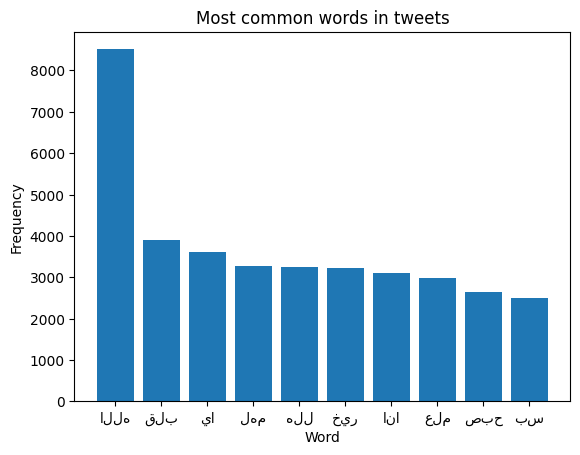

In [ ]:
df = pd.read_csv("output2.csv")
df = df.dropna(subset=["cleaned_tweet"])
df["cleaned_tweet"] = df["cleaned_tweet"].astype(str)
num_distinct_words = len(set(" ".join(df["cleaned_tweet"]).split()))
tweet_lengths = df["cleaned_tweet"].apply(len)
word_counts = Counter(" ".join(df["cleaned_tweet"]).split())
most_common_words = [word for word, count in word_counts.most_common(10)]
most_common_words 

# # Plot tweet length histogram
# plt.hist(tweet_lengths, bins=50)
# plt.title("Distribution of tweet lengths")
# plt.xlabel("Tweet length (characters)")
# plt.ylabel("Frequency")
# plt.show()

# Plot most common words bar chart
plt.bar(np.arange(len(most_common_words)), [word_counts[word] for word in most_common_words])
plt.xticks(np.arange(len(most_common_words)), most_common_words)
plt.title("Most common words in tweets")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

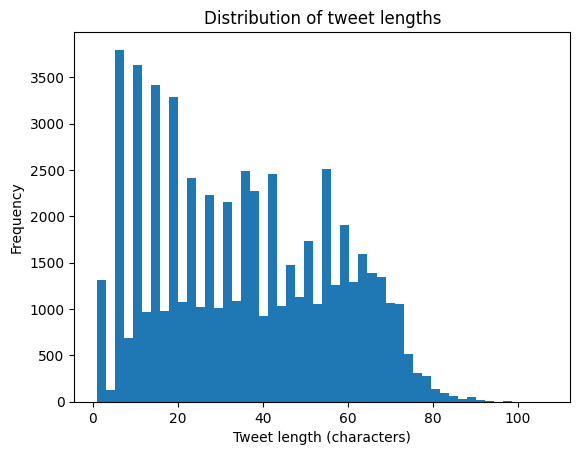

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt




# Read CSV file
df = pd.read_csv("output2.csv")

# Remove NaN values and convert cleaned_tweet to string
df = df.dropna(subset=["cleaned_tweet"])
df["cleaned_tweet"] = df["cleaned_tweet"].astype(str)
# mpl.rcParams['font.family'] = 'Amiri'
# Count number of distinct words
num_distinct_words = len(set(" ".join(df["cleaned_tweet"]).split()))

# Calculate tweet lengths
tweet_lengths = df["cleaned_tweet"].apply(len)

# Count word occurrences
word_counts = Counter(" ".join(df["cleaned_tweet"]).split())

# Get 10 most common words
most_common_words = [word for word, count in word_counts.most_common(10)]
# Plot tweet length histogram
plt.hist(tweet_lengths, bins=50)
plt.title("Distribution of tweet lengths")
plt.xlabel("Tweet length (characters)")
plt.ylabel("Frequency")
plt.show()



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


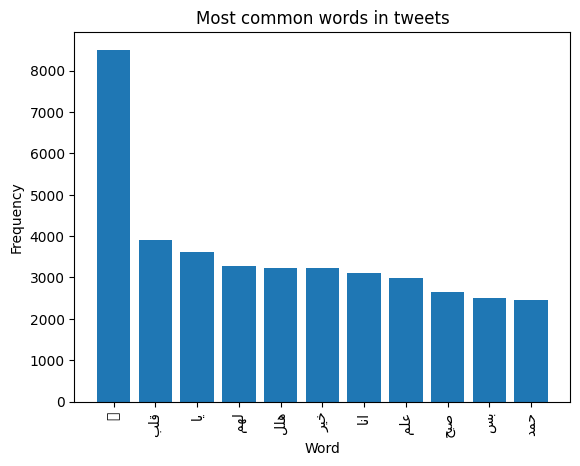

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter

# Set Arabic font for plot
plt.rcParams['font.family'] = 'DejaVu Sans'

# Load data and clean tweets
df = pd.read_csv("output2.csv")
df = df.dropna(subset=["cleaned_tweet"])
df["cleaned_tweet"] = df["cleaned_tweet"].astype(str)

# Count distinct words, tweet lengths, and most common words
num_distinct_words = len(set(" ".join(df["cleaned_tweet"]).split()))
tweet_lengths = df["cleaned_tweet"].apply(len)
word_counts = Counter(" ".join(df["cleaned_tweet"]).split())
most_common_words = [word for word, count in word_counts.most_common(11)]

# Reshape Arabic words for plot
most_common_words_reshaped = [get_display(arabic_reshaper.reshape(word)) for word in most_common_words]

# Plot most common words bar chart
plt.bar(np.arange(len(most_common_words)), [word_counts[word] for word in most_common_words])
plt.xticks(np.arange(len(most_common_words)), most_common_words_reshaped, rotation=90)
plt.title("Most common words in tweets")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


In [ ]:
pip install python-bidi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install arabic-reshaper


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
df = pd.read_csv("/content/output2.csv")
df.head()

,sentence,sentiment,cleaned_tweet
0,دامك مع #غناتي ، فالك طيب 👍,positive,دمك غنت فلك طيب
1,على الفطرة السليمه.. الله يعطيه الصحة والعافية...,positive,فطر سلم الله يعط صحه عفي سكر طبل لحق باب قفل
2,📷 مشجع هلالي ينبذ العنصرية ب لافته أعدها.,positive,شجع هلل نبذ عنصر لفت اعد
3,سبحان الله🌸 الحمدلله 💮 لا اله الا الله 🌿 الله ...,positive,الله حمدلل اله الله الله كبر غفر الله وتب الله...
4,مشاركتي في مبادراتكم الجميلة فوز وسعادة 💞,positive,شرك بدر جمل فوز سعد


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


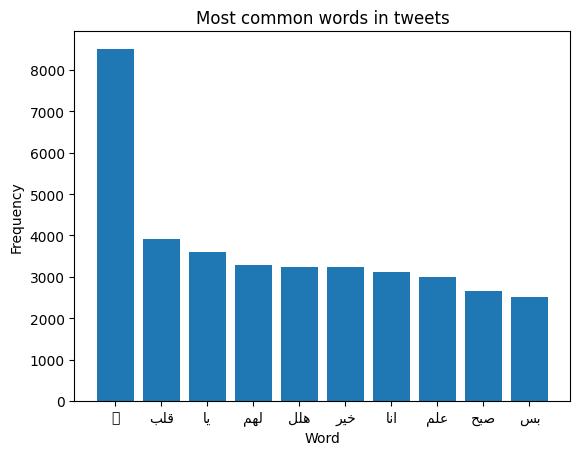

In [ ]:
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper
from collections import Counter
import pandas as pd
import numpy as np

# Read data
df = pd.read_csv("output2.csv")
df = df.dropna(subset=["cleaned_tweet"])
df["cleaned_tweet"] = df["cleaned_tweet"].astype(str)

# Reshape Arabic text for proper display
df["cleaned_tweet"] = df["cleaned_tweet"].apply(arabic_reshaper.reshape)
df["cleaned_tweet"] = df["cleaned_tweet"].apply(get_display)

# Compute number of distinct words, tweet lengths, and word counts
num_distinct_words = len(set(" ".join(df["cleaned_tweet"]).split()))
tweet_lengths = df["cleaned_tweet"].apply(len)
word_counts = Counter(" ".join(df["cleaned_tweet"]).split())
most_common_words = [word for word, count in word_counts.most_common(10)]

# Set the font to Amiri
# plt.rcParams["font.family"] = "Amiri"


# Plot most common words bar chart
plt.bar(np.arange(len(most_common_words)), [word_counts[word] for word in most_common_words])
plt.xticks(np.arange(len(most_common_words)), [arabic_reshaper.reshape(word) for word in most_common_words])
plt.title(arabic_reshaper.reshape("Most common words in tweets"))
plt.xlabel(arabic_reshaper.reshape("Word"))
plt.ylabel(arabic_reshaper.reshape("Frequency"))
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper
from collections import Counter
import pandas as pd
import numpy as np


df = pd.read_csv("output2.csv")
df = df.dropna(subset=["cleaned_tweet"])
df["cleaned_tweet"] = df["cleaned_tweet"].astype(str)

# Reshape Arabic text for proper display
df["cleaned_tweet"] = df["cleaned_tweet"].apply(arabic_reshaper.reshape)
df["cleaned_tweet"] = df["cleaned_tweet"].apply(get_display)


num_distinct_words = len(set(" ".join(df["cleaned_tweet"]).split()))
tweet_lengths = df["cleaned_tweet"].apply(len)
word_counts = Counter(" ".join(df["cleaned_tweet"]).split())
most_common_words = [word for word, count in word_counts.most_common(10)]
print(most_common_words)

['ﷲ', 'ﺐﻠﻗ', 'ﺎﻳ', 'ﻢﻬﻟ', 'ﻞﻠﻫ', 'ﺮﻴﺧ', 'ﺎﻧﺍ', 'ﻢﻠﻋ', 'ﺢﺒﺻ', 'ﺲﺑ']


In [ ]:
import matplotlib.font_manager as fm

font_path = "/content/Amiri-Regular.ttf"  
fm.fontManager.addfont(font_path)


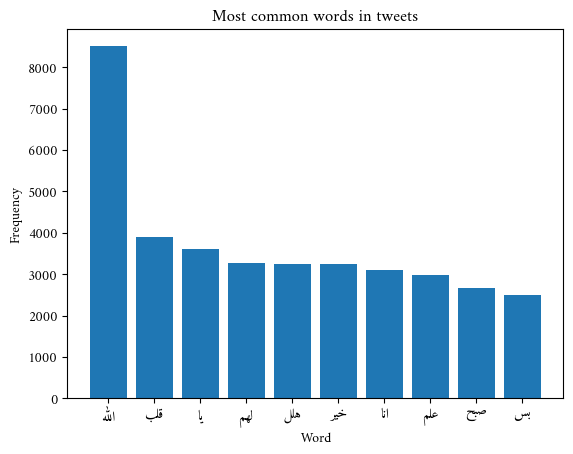

In [ ]:
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper
from collections import Counter
import pandas as pd
import numpy as np

# Read data
df = pd.read_csv("output2.csv")
df = df.dropna(subset=["cleaned_tweet"])
df["cleaned_tweet"] = df["cleaned_tweet"].astype(str)

# Reshape Arabic text for proper display
df["cleaned_tweet"] = df["cleaned_tweet"].apply(arabic_reshaper.reshape)
df["cleaned_tweet"] = df["cleaned_tweet"].apply(get_display)

# Compute number of distinct words, tweet lengths, and word counts
num_distinct_words = len(set(" ".join(df["cleaned_tweet"]).split()))
tweet_lengths = df["cleaned_tweet"].apply(len)
word_counts = Counter(" ".join(df["cleaned_tweet"]).split())
most_common_words = [word for word, count in word_counts.most_common(10)]

# Set the font to Amiri
plt.rcParams["font.family"] = "Amiri"


# Plot most common words bar chart
plt.bar(np.arange(len(most_common_words)), [word_counts[word] for word in most_common_words])
plt.xticks(np.arange(len(most_common_words)), [arabic_reshaper.reshape(word) for word in most_common_words])
plt.title(arabic_reshaper.reshape("Most common words in tweets"))
plt.xlabel(arabic_reshaper.reshape("Word"))
plt.ylabel(arabic_reshaper.reshape("Frequency"))
plt.show()